In [244]:
import multimodal_model as mm
import importlib as imp
import pandas as pd
imp.reload(mm)

<module 'multimodal_model' from '/gpfs/data/rsingh47/anair27/singh-lab-TCGA-project/multiomic-model-tcga/models/MAVI/multimodal_model.py'>

In [245]:
modalities = {
"CNV" : "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_cnv_data.csv",
"EPIGENOMIC" : "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_epigenomic_data.csv",
"TRANSCRIPTOMIC" : "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_transcriptomic_data.csv",
"IMAGING" : "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/imaging_data_updated"
}

In [246]:
training_cases = list(pd.read_csv("/users/anair27/data/TCGA_Data/project_LUAD/data_processed/training_cases.csv")["case_id"])
testing_cases = list(pd.read_csv("/users/anair27/data/TCGA_Data/project_LUAD/data_processed/testing_cases.csv")["case_id"])

In [247]:
mmm = mm.MultimodalModel(modalities)

In [248]:
CLINICAL = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_clinical_data.csv"

In [249]:
clinical_df = pd.read_csv(CLINICAL, index_col = 0)
diagnosis = clinical_df[["vital_status_Dead", "case_id"]]

In [250]:
clinical_data = clinical_df.loc[:, clinical_df.columns != 'vital_status_Dead']
clinical_data.head(5)

,ethnicity_not hispanic or latino,ethnicity_not reported,race_asian,race_black or african american,race_not reported,race_white,ajcc_pathologic_t_T1a,ajcc_pathologic_t_T1b,ajcc_pathologic_t_T2,ajcc_pathologic_t_T2a,...,synchronous_malignancy_Not Reported,synchronous_malignancy_Yes,"tissue_or_organ_of_origin_Lung, NOS",tissue_or_organ_of_origin_Main bronchus,"tissue_or_organ_of_origin_Middle lobe, lung",tissue_or_organ_of_origin_Overlapping lesion of lung,"tissue_or_organ_of_origin_Upper lobe, lung",treatment_or_therapy_not reported,treatment_or_therapy_yes,case_id
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,TCGA-78-8640
1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,TCGA-05-5425
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,TCGA-55-7815
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,TCGA-44-7661
4,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,TCGA-97-7554


In [251]:
mmm.add_modality(name = "CLINICAL", data = clinical_data)

In [255]:
x_train, y_train, x_test, y_test = mmm.merge_data(y = diagnosis, train_ids = training_cases, test_ids = testing_cases, load_data = True)

Merging CNV and EPIGENOMIC...
Merging in TRANSCRIPTOMIC...
Merging in CLINICAL...
Merging target variable data (y)...


In [256]:
mmm.merged.head()

,case_id,CNV-ENSG00000240361.2,CNV-ENSG00000186092.6,CNV-ENSG00000238009.6,CNV-ENSG00000239945.1,CNV-ENSG00000233750.3,CNV-ENSG00000268903.1,CNV-ENSG00000269981.1,CNV-ENSG00000239906.1,CNV-ENSG00000241860.7,...,CLINICAL-synchronous_malignancy_Not Reported,CLINICAL-synchronous_malignancy_Yes,"CLINICAL-tissue_or_organ_of_origin_Lung, NOS",CLINICAL-tissue_or_organ_of_origin_Main bronchus,"CLINICAL-tissue_or_organ_of_origin_Middle lobe, lung",CLINICAL-tissue_or_organ_of_origin_Overlapping lesion of lung,"CLINICAL-tissue_or_organ_of_origin_Upper lobe, lung",CLINICAL-treatment_or_therapy_not reported,CLINICAL-treatment_or_therapy_yes,vital_status_Dead
0,TCGA-35-4122,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,1,1,0,0
1,TCGA-75-6203,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
2,TCGA-75-5146,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,TCGA-78-8648,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,1,0,0,1
4,TCGA-55-A4DG,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,1,0,0,0


In [257]:
mmm.create_model()

In [ ]:
mmm.model

In [ ]:
import tensorflow as tf

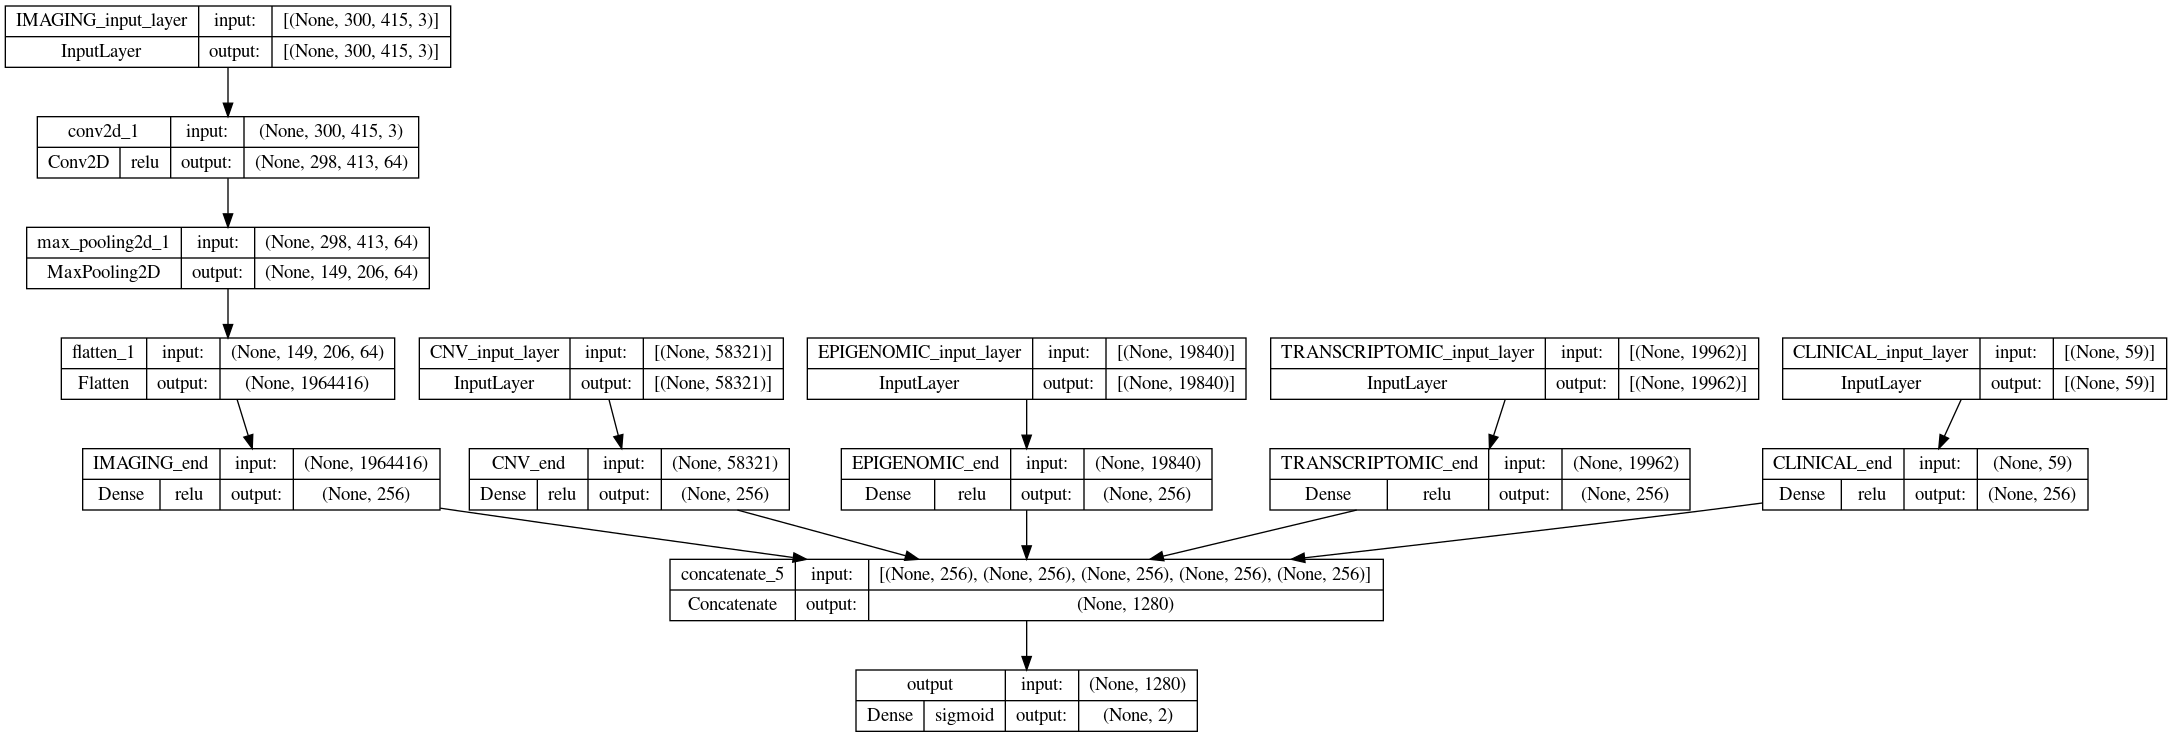

In [258]:
tf.keras.utils.plot_model(mmm.model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [97]:
print(mmm.modalities[2])

TRANSCRIPTOMIC


In [101]:
mmm.modalities[0].vars

['ENSG00000284159.1',
 'ENSG00000211972.2',
 'ENSG00000262408.1',
 'ENSG00000272556.2',
 'ENSG00000108424.11',
 'ENSG00000169085.13',
 'ENSG00000244558.6',
 'ENSG00000232735.2',
 'ENSG00000197568.14',
 'ENSG00000067177.15',
 'ENSG00000075073.15',
 'ENSG00000285656.1',
 'ENSG00000207933.3',
 'ENSG00000247134.7',
 'ENSG00000257852.1',
 'ENSG00000225310.1',
 'ENSG00000229180.7',
 'ENSG00000254663.1',
 'ENSG00000237380.7',
 'ENSG00000182372.10',
 'ENSG00000202408.2',
 'ENSG00000122133.17',
 'ENSG00000156172.6',
 'ENSG00000228322.1',
 'ENSG00000221241.1',
 'ENSG00000227374.1',
 'ENSG00000205981.8',
 'ENSG00000269938.1',
 'ENSG00000256811.1',
 'ENSG00000137857.17',
 'ENSG00000266893.1',
 'ENSG00000153064.12',
 'ENSG00000183735.11',
 'ENSG00000141499.17',
 'ENSG00000230673.3',
 'ENSG00000124164.16',
 'ENSG00000280382.1',
 'ENSG00000149443.7',
 'ENSG00000237124.1',
 'ENSG00000284976.1',
 'ENSG00000257058.1',
 'ENSG00000162367.11',
 'ENSG00000155428.12',
 'ENSG00000270336.1',
 'ENSG00000249284.

In [102]:
mmm.merged

,case_id,ENSG00000240361.2,ENSG00000186092.6_x,ENSG00000238009.6,ENSG00000239945.1,ENSG00000233750.3,ENSG00000268903.1,ENSG00000269981.1,ENSG00000239906.1,ENSG00000241860.7,...,ENSG00000288654.1_y,ENSG00000288656.1_y,ENSG00000288658.1_y,ENSG00000288660.1_y,ENSG00000288661.1_y,ENSG00000288669.1_y,ENSG00000288671.1_y,ENSG00000288674.1_y,ENSG00000288675.1_y,vital_status_Dead
0,TCGA-35-4122,3,3,3,3,3,3,3,3,3,...,0.0,0.0000,0.7707,0.0000,0.0,0.0000,0.0,0.0061,0.1877,0
1,TCGA-75-6203,2,2,2,2,2,2,2,2,2,...,0.0,0.0077,0.0302,0.0000,0.0,0.0000,0.0,0.0279,0.2131,0
2,TCGA-75-5146,2,2,2,2,2,2,2,2,2,...,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0104,0.0988,0
3,TCGA-78-8648,2,2,2,2,2,2,2,2,2,...,0.0,0.0000,0.2541,0.0000,0.0,0.0000,0.0,0.0107,0.2448,1
4,TCGA-55-A4DG,4,4,4,4,4,4,4,4,4,...,0.0,0.0000,0.2708,0.1105,0.0,0.0000,0.0,0.0362,0.2391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,TCGA-64-5775,3,3,3,3,3,3,3,3,3,...,0.0,0.0000,0.0227,0.0000,0.0,0.0000,0.0,0.0093,0.0801,1
498,TCGA-05-4418,2,2,2,2,2,2,2,2,2,...,0.0,0.0000,0.2720,0.0000,0.0,0.0000,0.0,0.0135,0.1458,1
499,TCGA-62-8398,2,2,2,2,2,2,2,2,2,...,0.0,0.0047,0.0435,0.0000,0.0,0.0046,0.0,0.0172,0.1206,1
500,TCGA-55-8097,2,2,2,2,2,2,2,2,2,...,0.0,0.0000,0.0692,0.0404,0.0,0.0000,0.0,0.0244,0.1659,0


In [260]:
import tensorflow

In [1]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TensorFlow")

2023-04-02 22:43:25.051296: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 22:43:25.587867: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-02 22:43:27.908723: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/runtime/opt/cudnn/8.2.0/lib64:/gpfs/runtime/opt/cuda/11.7.1/cuda/lib64:/gpfs/runtime/opt/cuda/11.7.1/src/lib64:/gpfs/runtime/opt/openssl/3.0.0/lib64:/gpfs/runtime/opt/python/3.11.0/lib
2023-04-02 22

Please install GPU version of TensorFlow


2023-04-02 22:43:32.444724: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 22:43:32.449518: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/runtime/opt/cudnn/8.2.0/lib64:/gpfs/runtime/opt/cuda/11.7.1/cuda/lib64:/gpfs/runtime/opt/cuda/11.7.1/src/lib64:/gpfs/runtime/opt/openssl/3.0.0/lib64:/gpfs/runtime/opt/python/3.11.0/lib
2023-04-02 22:43:32.449593: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-02 22:43:32.449634: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel dr

In [4]:
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [6]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
model = tf.keras.models.load_model("/users/anair27/data/anair27/singh-lab-TCGA-project/multiomic-model-tcga/__plots/multimodal_models/mm_model")

AttributeError: 'NoneType' object has no attribute 'history'